# Dignitas Fund Donations from Individuals Analytics

In [2]:
import pandas as pd

df = pd.read_excel('./data/FinMap.xlsx', sheet_name = 'Лист 1', index_col=None, 
                   usecols = 'A, E, F, G, H, I, J, K, L, N')
# remove spending
df = df[df['From Account'].isna()]
df = df.drop('From Account', axis=1)

In [4]:
def format_money(value):
    return '{:,.2f}'.format(value)

## Received to Dignitas Fund Accounts

In [5]:
format_money(df['UAH'].sum())

'38,474,992.47'

In [6]:
amt_by_acc = pd.DataFrame(df.groupby('To Account')['UAH'].sum())
amt_by_acc = amt_by_acc.sort_values('UAH', ascending = False)
amt_by_acc.applymap(format_money)

,UAH
To Account,
ПриватБанк Люті пташки,"21,647,645.55"
"АТ ""УНІВЕРСАЛ БАНК"" (МоноБанк загальний)","10,903,068.52"
ПриватБанк Загальний рахунок зборів,"3,751,270.55"
"АТ ""УНІВЕРСАЛ БАНК"" долар","1,828,430.00"
ПриватБанк Адмін рахунок,"209,500.00"
ПриватБанк Долар,"109,961.78"
Приват 1000 дронів для України,"15,350.00"
ПриватБанк PLN,"8,395.63"
ПриватБанк євро,"1,370.44"


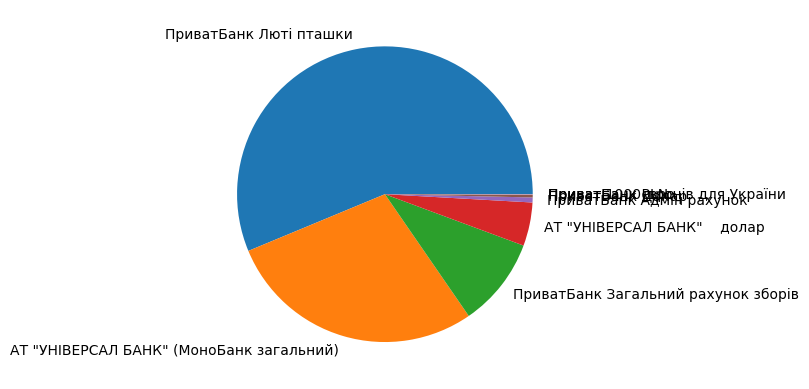

In [7]:
import matplotlib.pyplot as plt

plt.pie(amt_by_acc['UAH'], labels = amt_by_acc.index)
plt.show()

In [16]:
amt_by_acc = pd.DataFrame(df.groupby('Subcategory')['UAH'].sum())
amt_by_acc = amt_by_acc.sort_values('UAH', ascending = False)
amt_by_acc.applymap(format_money)

,UAH
Subcategory,
Донати Люті пташки,"23,916,139.68"
Грант МЛПК,"10,605,281.40"
Донати Дрони,"1,462,744.00"
Загальні донати,"1,438,349.24"
Донати Лопати,"462,552.00"
Адмін Донати,"385,279.40"
Донати Вей Фор Пей,"123,332.25"
Донати 1000 дронів для України,"15,050.00"


## Donations statistics

In [8]:
pd.DataFrame(df['UAH'].describe().map(format_money))

,UAH
count,"8,849.00"
mean,"4,347.95"
std,"129,262.96"
min,0.01
25%,100.00
50%,300.00
75%,500.00
max,"9,943,074.00"


## Most frequent donation amounts

In [10]:
from collections import Counter

pd.DataFrame(Counter(df['UAH']).most_common(10), columns=['UAH', 'frequency'])

,UAH,frequency
0,100.0,1474
1,500.0,1297
2,200.0,1120
3,1000.0,1042
4,300.0,683
5,50.0,516
6,2000.0,195
7,10.0,146
8,400.0,145
9,150.0,134


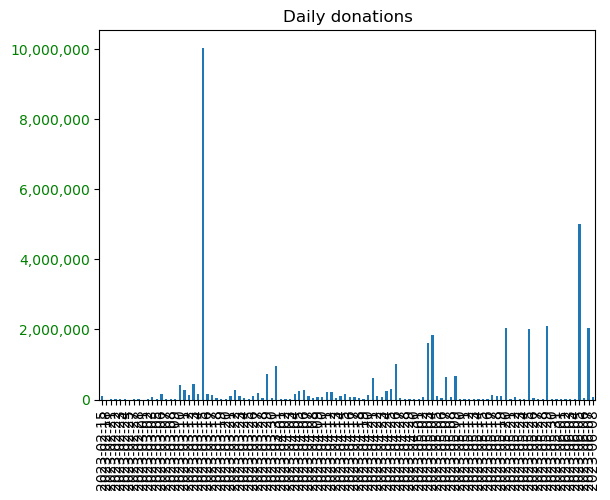

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['UAH'].groupby(df['Date'].dt.to_period('D')).sum().plot(
    kind='bar', xlabel='',  title ='Daily donations')

ax.yaxis.set_major_formatter('{x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Weekly donations

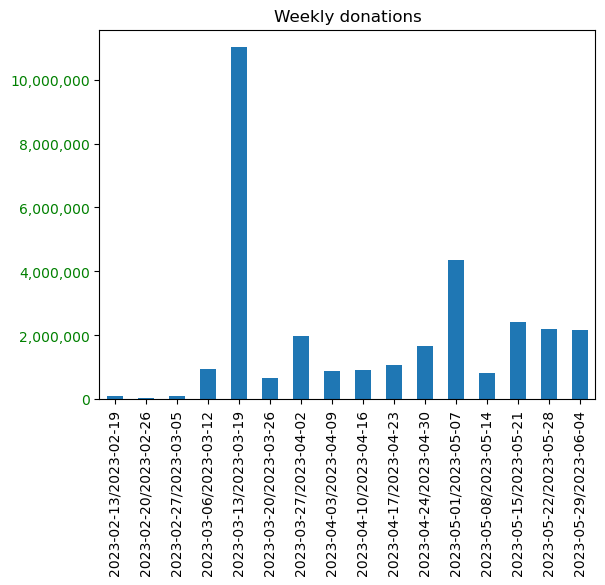

In [12]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


tmp = df['UAH'].groupby(df['Date'].dt.to_period('W')).sum()
tmp[:-1].plot(kind='bar', xlabel='', title = 'Weekly donations')
# dollar ticksb
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Top donation days are Friday, Tuesday, Saturday and Wednesday

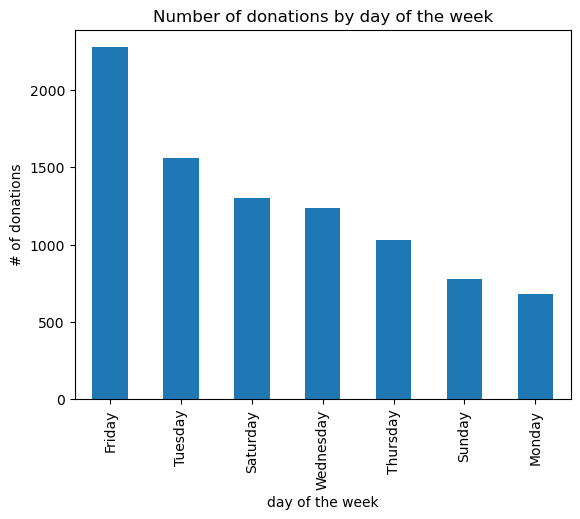

In [13]:
import warnings
warnings.filterwarnings("ignore")

tmp=df.groupby([ df['Date'].dt.day_name()] )['UAH'].count().sort_values(ascending = False).plot(
    kind='bar', title ='Number of donations by day of the week', 
    xlabel = 'day of the week', ylabel = '# of donations')

## Donations by hour

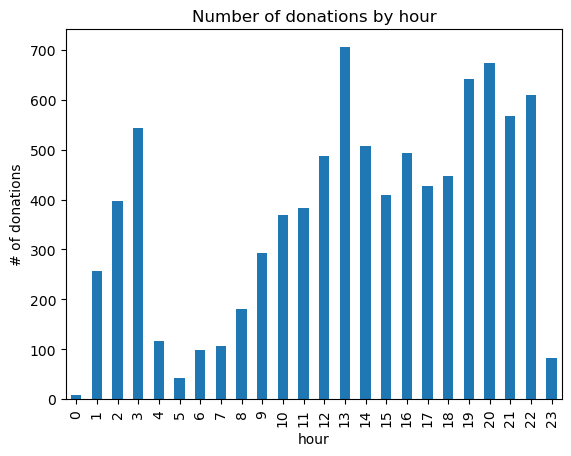

In [14]:
tmp = df.groupby([ df['Date'].dt.hour] )['UAH'].count().plot(
    kind='bar', xlabel = 'hour', ylabel = '# of donations', title = 'Number of donations by hour')